# TUGAS BESAR TF6002
- SIMULASI DISTRIBUSI TEMPERATUR DENGAN METODE BEDA HINGGA EKSPLISIT

## Inisiasi - kondisi awal

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [18]:
# Ukuran logam
Xmin = 0      #m
Xmax = 1
Ymin = 0
Ymax = 1

# Ukuran heat insulator
a = 0.25       #m
b = 0.15
c = b

# Lokasi heat insulator
# heat insulator bawah
yu = (Ymax-Ymin)/2 - b/2
yl = yu - b

# heat insulator atas
yl_2 = (Ymax-Ymin)/2 + b/2
yu_2 = yl_2 + b

# posisi x
xl = (Xmax-Xmin)/2 - a/2
xu = (Xmax-Xmin)/2 + a/2


# Properti logam - difusivitas termal
# copper = 117 mm2/s = 1.17e-4 m2/s
# silver = 174 mm2/s = 1.74-4 m2/s
alpha = 1.74e-4
alpha2 = 1.17e-4


## Kondisi batas
# temperatur awal
T0 = 15         #deg C
# temperatur lingkungan
Ta_1 = 50
Ta_2 = 100
Ta_3 = 20 

In [19]:
class Awal:
    def __init__(self, dx, dy, T0):
        self.dx = dx
        self.dy = dy
        self.T0 = T0
        
    # definisikan ukuran matriks
    def matriks(self):
        numX = int((Xmax-Xmin)/self.dx + 1)
        numY = int((Ymax-Ymin)/self.dy + 1)
        T_t0 = self.T0*np.ones((numX,numY))
        # masukkan kondisi batas
        T_t0[0,:] = Ta_3
        T_t0[:,-1] = Ta_3
        T_t0[-1,:] = Ta_1
        T_t0[:,0] = Ta_2
        # save copy
        self.T_t0 = T_t0
        return self.T_t0
    
    def plot(self, T_t0, figsize=(12,10), rot=90, ticks=1):
        # plot kondisi awal
        fig, axs = plt.subplots(figsize=figsize)
        c = axs.pcolormesh(T_t0, cmap='coolwarm', vmin=15, vmax=100)
        fig.colorbar(c, ax=axs)
        axs.set_title('Kondisi awal')
        
        xt = [round(i,2) for i in np.arange(0, Xmax/self.dx+1, 1*ticks)]
        xt_new = [round(i,2) for i in np.arange(0,Xmax+self.dx, self.dx*ticks)]
        plt.xticks(xt, xt_new, rotation=rot)
        plt.yticks(xt,xt_new)

In [20]:
# step
# syarat
# Fo = alpha*dt/(dx**2)
# Fo <=1/4

## Metode Beda Hingga Eksplisit

In [21]:
# Gauss-Siedl iteration
class FDM:
    def __init__(self, T_t0, dx, dy, dt, t_end, alpha):
        self.T_t0 = T_t0
        self.dx = dx
        self.dy = dy    
        self.dt = dt
        self.t_end = t_end
        self.alpha = alpha
        
    def matriks(self):
        numX = int((Xmax-Xmin)/self.dx + 1)
        numY = int((Ymax-Ymin)/self.dy + 1)
        dt = self.dt
        t0 = 0                #sekon
        t_end = self.t_end    #sekon
        T_n = self.T_t0.copy()
        T_np1 = self.T_t0.copy()
        num_timestep = (t_end-t0)/dt
        Fo = self.alpha*self.dt/(self.dx**2)

        # FDM with insulator
        for time in range(int(num_timestep)):
            t=time+1
            for y,y_num in zip(np.arange(self.dy,(numY-1),self.dy), range(numY-2)):
                j = y_num+1
                for x,x_num in zip(np.arange(self.dx,(numX-1),self.dx), range(numX-2)):
                    i=x_num+1
                    if (x>=yl_2 and x<=yu_2) and (y>=xl and y<=xu):
                        T_np1[i,j] = 15
                    elif (x>=yl and x<=yu) and (y>=xl and y<=xu):
                        T_np1[i,j] = 15
                    else:
                        T_np1[i,j] = (1-4*Fo)*T_n[i,j] + Fo*(T_n[i+1,j] + T_n[i-1,j] + T_n[i,j+1] + T_n[i,j-1])
            T_n = T_np1.copy()
        self.T_np1 = T_np1
        return self.T_np1
    
    def plot(self, T_np1, figsize=(12,10), rot=90, ticks=1):
        # plot distribusi temperatur
        fig, axs = plt.subplots(figsize=figsize)
        axs.set_title('Distribusi temperatur untuk dx = %s, dy = %s, dt = %s, alpha = %s'%(self.dx, self.dy, self.dt, self.alpha))
        c = axs.pcolormesh(T_np1, cmap='coolwarm', vmin=15, vmax=100)
        fig.colorbar(c, ax=axs)
        
        xt = [round(i,2) for i in np.arange(0, Xmax/self.dx+1, 1*ticks)]
        xt_new = [round(i,2) for i in np.arange(0,Xmax+self.dx, self.dx*ticks)]
        plt.xticks(xt, xt_new, rotation=rot)
        plt.yticks(xt,xt_new)
        plt.show()

## VARIASI PARAMETER

### 1) Variasi dx = dy = 0.1

Waktu komputasi : 0.064 detik


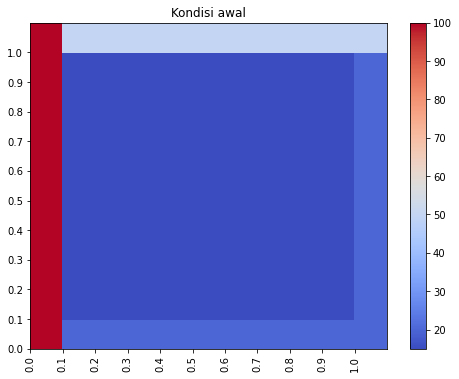

In [22]:
waktu_awal = time.time()
awal = Awal(0.1,0.1,T0)
T_t0 = awal.matriks()
awal.plot(T_t0, figsize=(8,6))
print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

Simulasi untuk alpha = 0.000174
Simulasi untuk t = 100


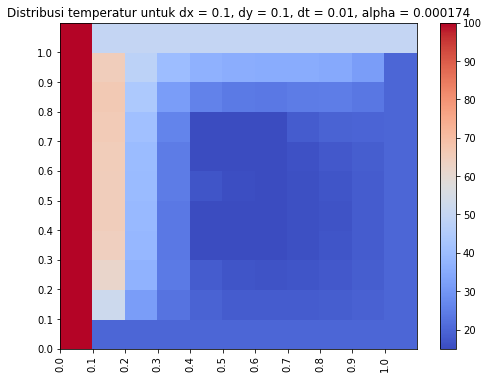

Waktu komputasi : 3.5059 detik


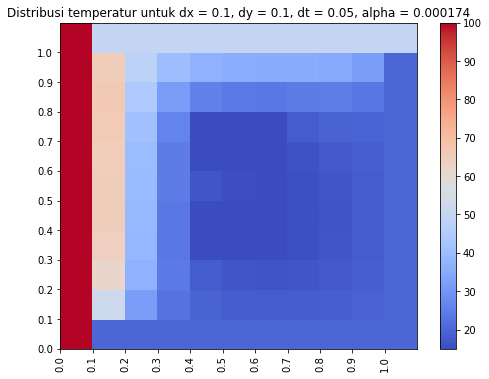

Waktu komputasi : 0.8646 detik


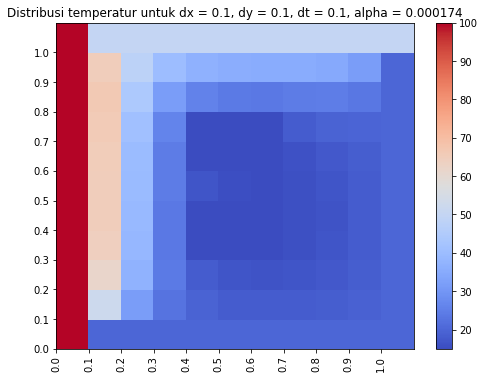

Waktu komputasi : 0.6324 detik
Simulasi untuk t = 200


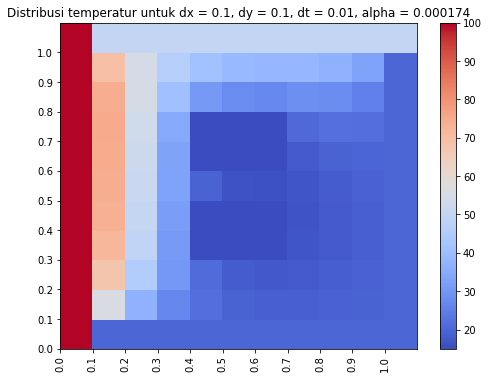

Waktu komputasi : 6.7322 detik


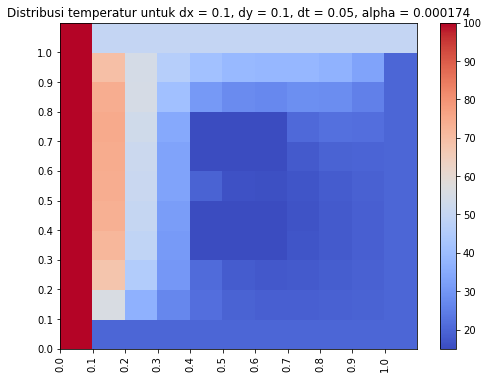

Waktu komputasi : 1.4285 detik


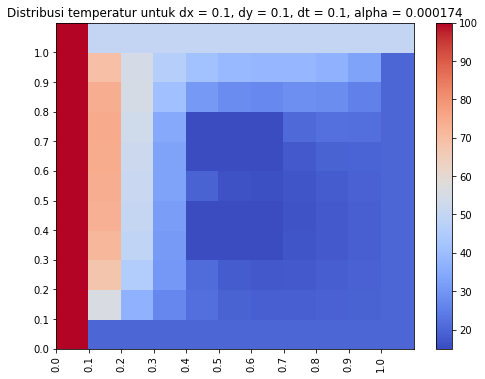

Waktu komputasi : 0.83 detik
Simulasi untuk t = 300


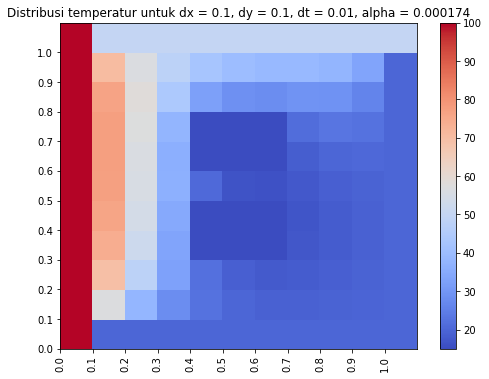

Waktu komputasi : 9.341 detik


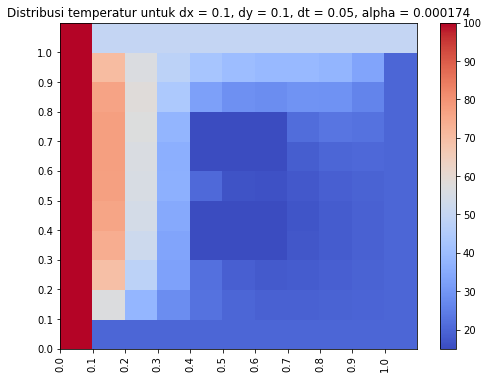

Waktu komputasi : 1.9765 detik


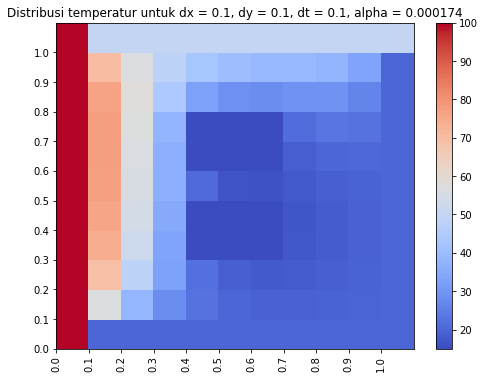

Waktu komputasi : 1.0826 detik
Simulasi untuk alpha = 0.000117
Simulasi untuk t = 100


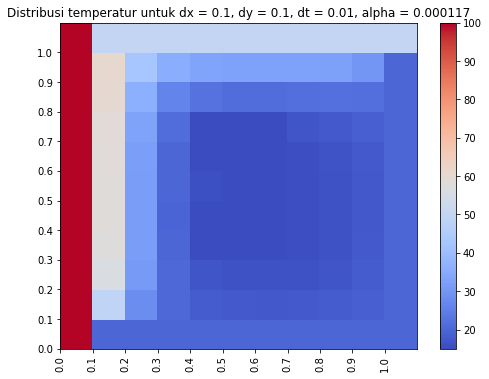

Waktu komputasi : 3.5125 detik


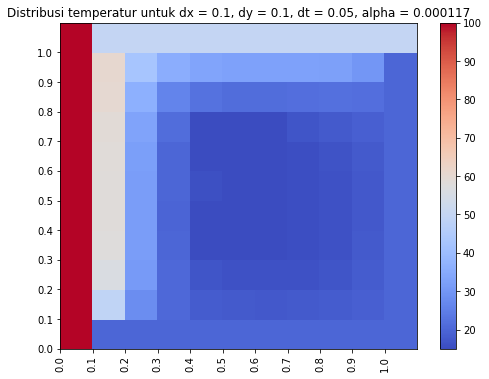

Waktu komputasi : 0.8106 detik


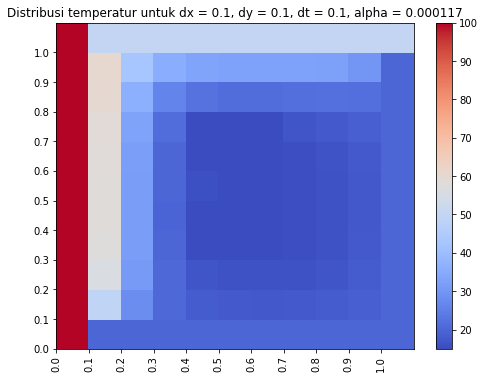

Waktu komputasi : 0.5657 detik
Simulasi untuk t = 200


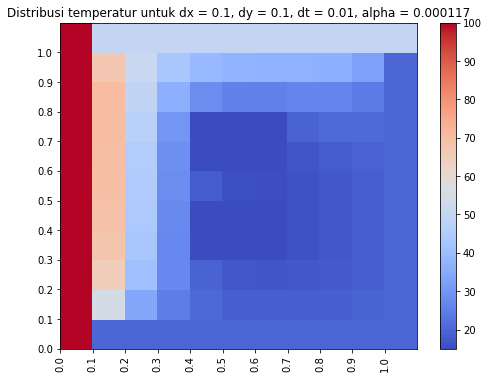

Waktu komputasi : 6.4544 detik


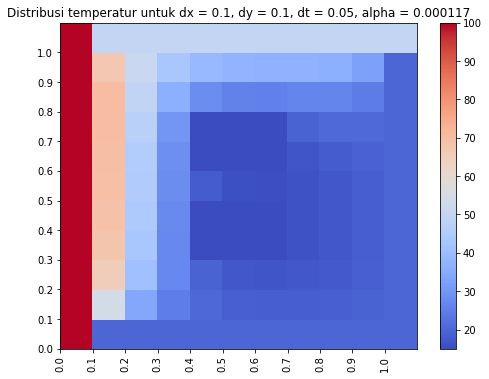

Waktu komputasi : 1.4084 detik


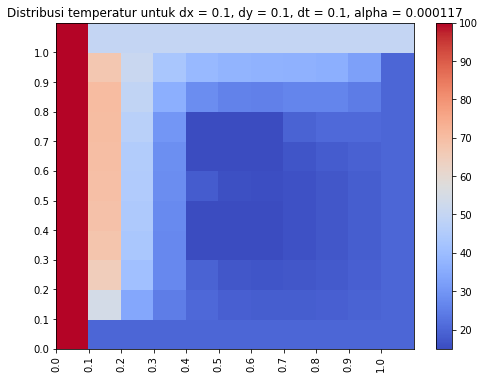

Waktu komputasi : 0.8577 detik
Simulasi untuk t = 300


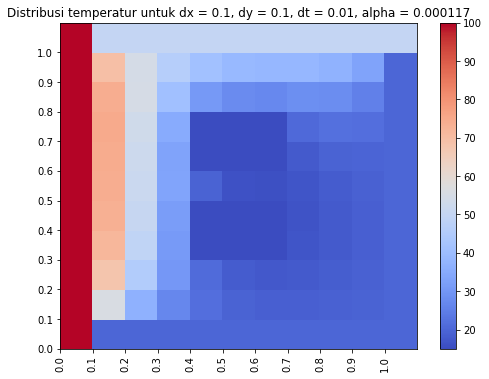

Waktu komputasi : 8.93 detik


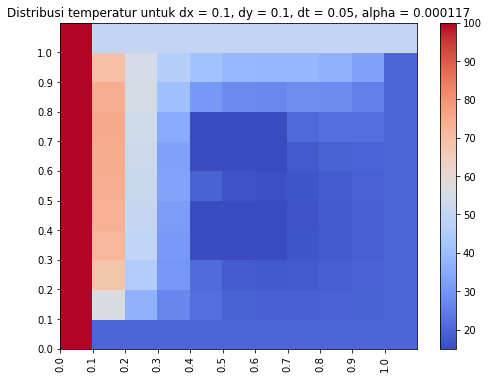

Waktu komputasi : 1.9737 detik


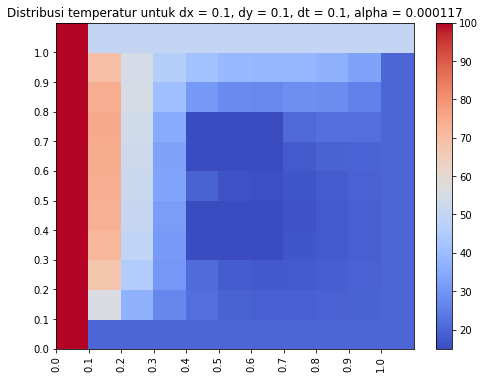

Waktu komputasi : 1.0905 detik


In [24]:
var_t = [100, 200, 300]
var_dt = [0.01, 0.05, 0.1]
for mat in [alpha, alpha2]:
    print('Simulasi untuk alpha = %s'%mat)
    for t in var_t:
        print('Simulasi untuk t = %s'%t)
        for i in var_dt:
            waktu_awal = time.time()
            distribusi = FDM(T_t0, 0.1, 0.1, i, t, mat)
            matriks_fdm = distribusi.matriks()
            plot_fdm = distribusi.plot(matriks_fdm, figsize=(8,6))
            print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

### 1) Variasi dx = dy = 0.05

Waktu komputasi : 0.081 detik


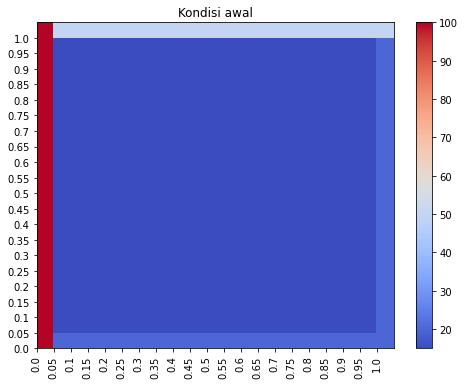

In [25]:
waktu_awal = time.time()
awal_2 = Awal(0.05,0.05,T0)
T_t0_2 = awal_2.matriks()
awal_2.plot(T_t0_2, figsize=(8,6))
print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

In [26]:
var_t = [100, 200, 300]
var_dt = [0.01, 0.05, 0.1]

Simulasi untuk alpha = 0.000174
Simulasi untuk t = 100


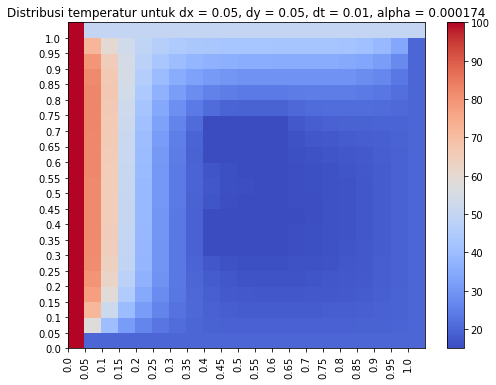

Waktu komputasi : 12.8383 detik


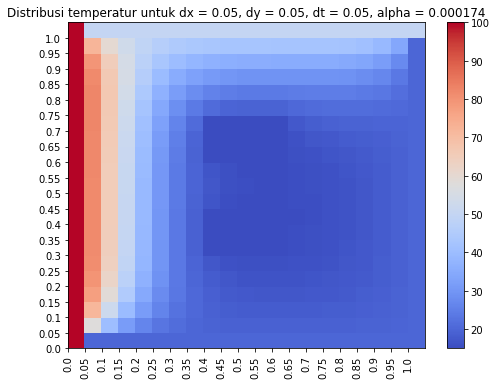

Waktu komputasi : 2.9064 detik


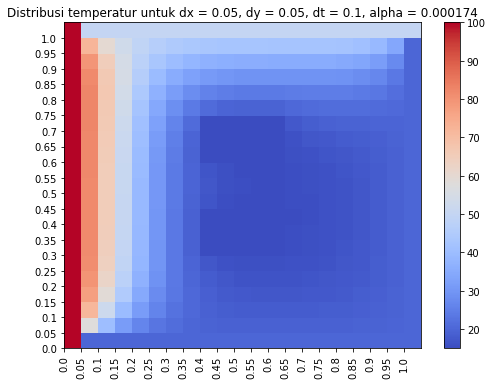

Waktu komputasi : 1.6252 detik
Simulasi untuk t = 200


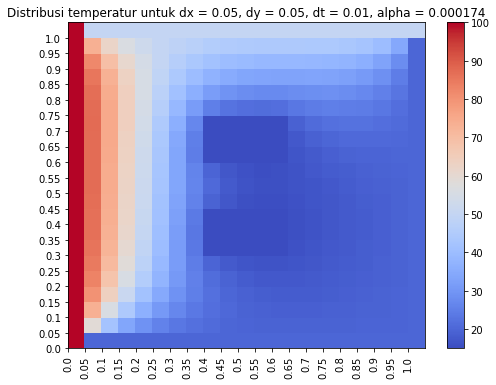

Waktu komputasi : 25.5683 detik


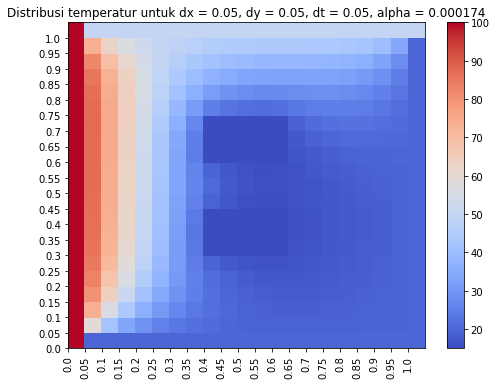

Waktu komputasi : 5.3883 detik


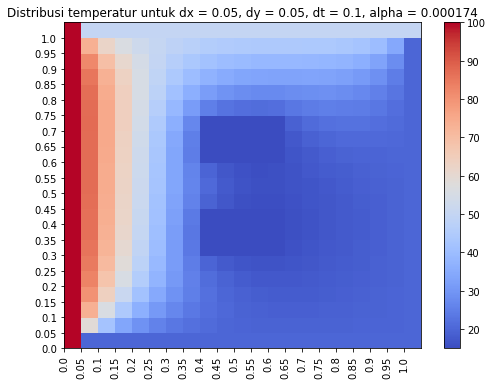

Waktu komputasi : 2.8609 detik
Simulasi untuk t = 300


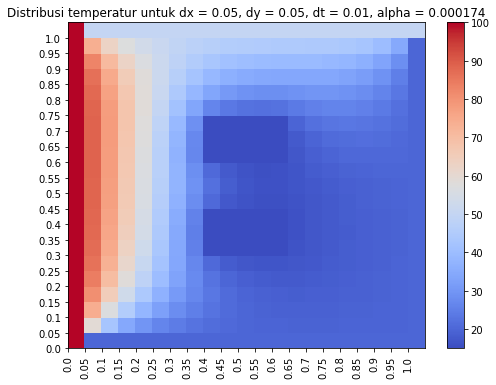

Waktu komputasi : 38.2026 detik


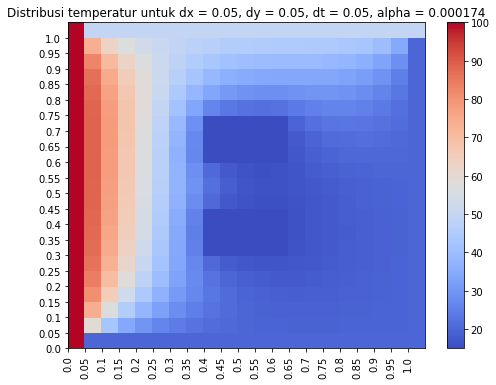

Waktu komputasi : 7.9008 detik


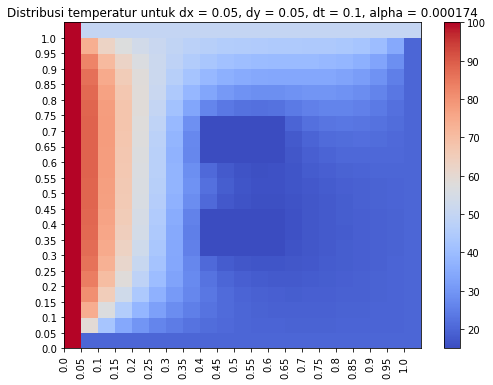

Waktu komputasi : 4.1961 detik
Simulasi untuk alpha = 0.000117
Simulasi untuk t = 100


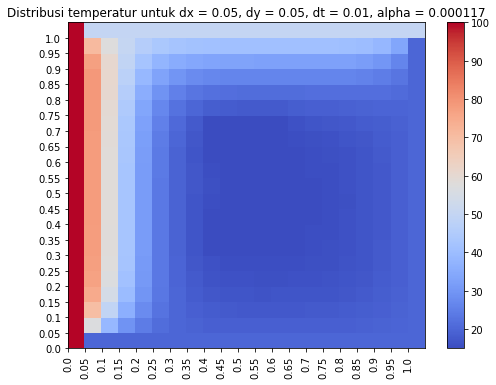

Waktu komputasi : 13.7257 detik


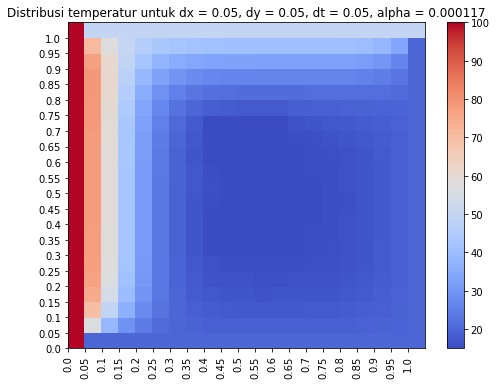

Waktu komputasi : 4.0858 detik


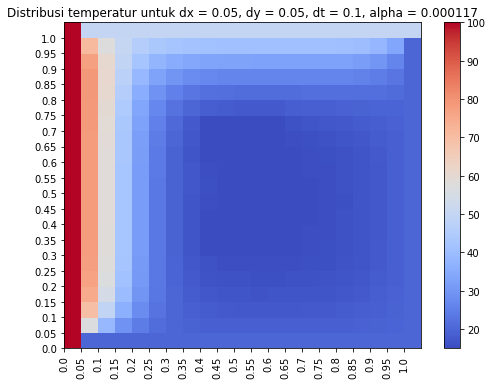

Waktu komputasi : 1.8728 detik
Simulasi untuk t = 200


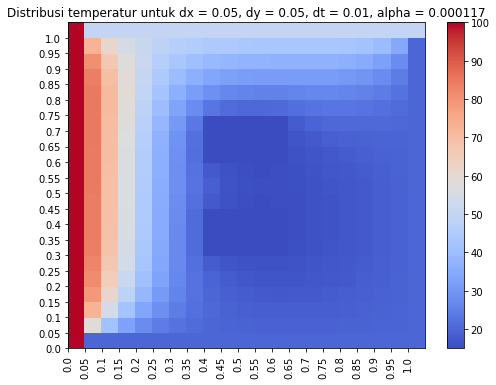

Waktu komputasi : 28.6258 detik


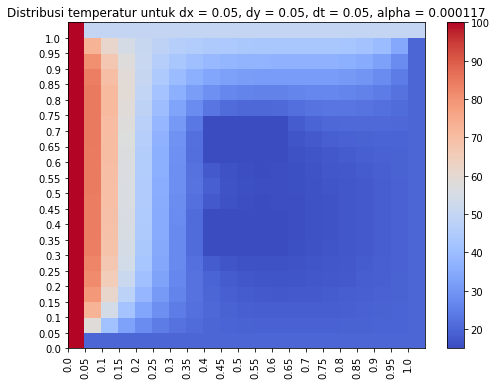

Waktu komputasi : 5.5172 detik


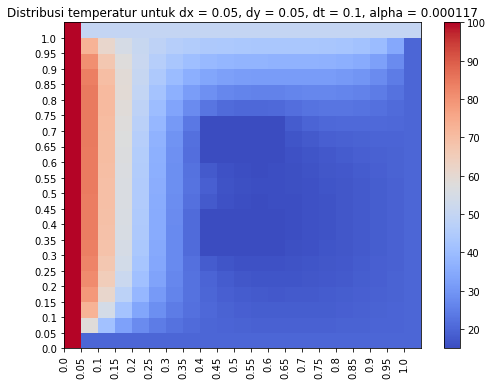

Waktu komputasi : 2.8788 detik
Simulasi untuk t = 300


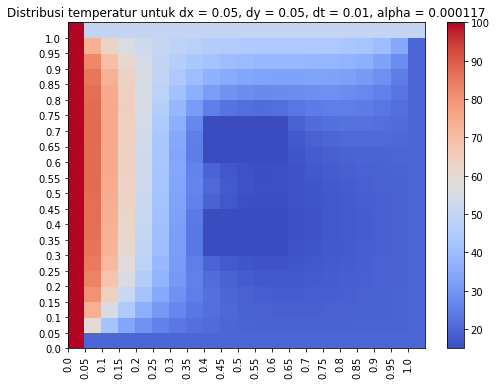

Waktu komputasi : 43.1003 detik


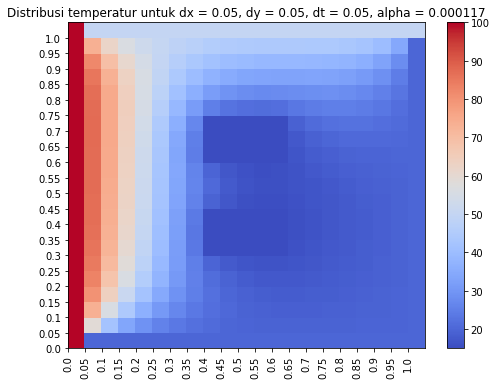

Waktu komputasi : 9.8053 detik


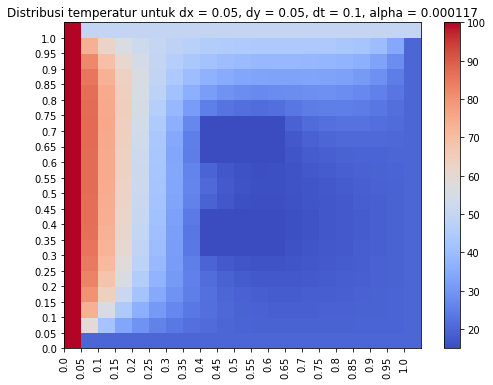

Waktu komputasi : 6.6128 detik


In [27]:
for mat in [alpha, alpha2]:
    print('Simulasi untuk alpha = %s'%mat)
    for t in var_t:
        print('Simulasi untuk t = %s'%t)
        for i in var_dt:
            waktu_awal = time.time()
            distribusi_2 = FDM(T_t0_2, 0.05, 0.05, i, t, mat)
            matriks_fdm_2 = distribusi_2.matriks()
            plot_fdm_2 = distribusi_2.plot(matriks_fdm_2, figsize=(8,6))
            print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

### 1) Variasi dx = dy = 0.01

Waktu komputasi : 0.0999 detik


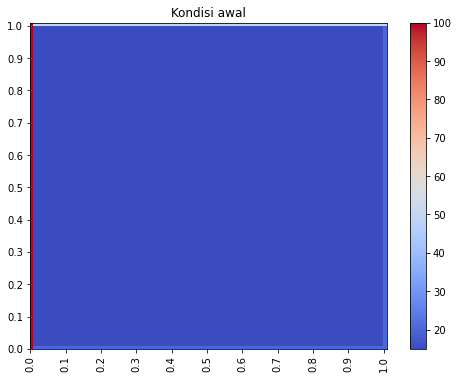

In [29]:
waktu_awal = time.time()
awal_3 = Awal(0.01,0.01,T0)
T_t0_3 = awal_3.matriks()
awal_3.plot(T_t0_3, figsize=(8,6), ticks=10)
print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

Simulasi untuk alpha = 0.000174
Simulasi untuk t = 100


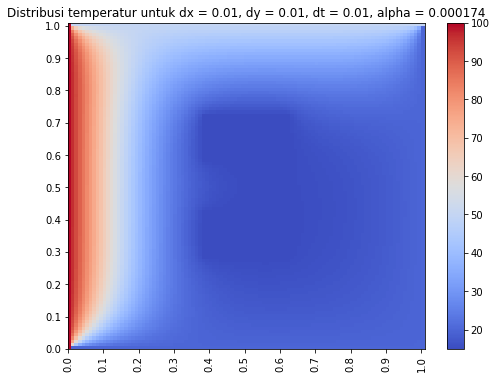

Waktu komputasi : 369.1234 detik


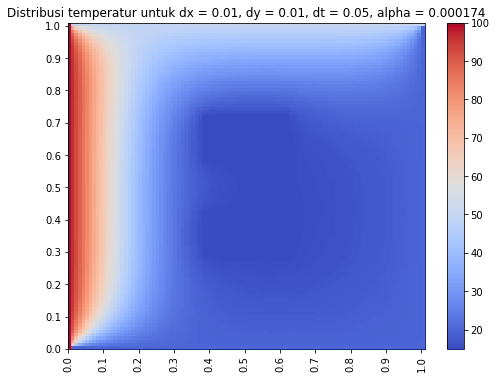

Waktu komputasi : 71.236 detik


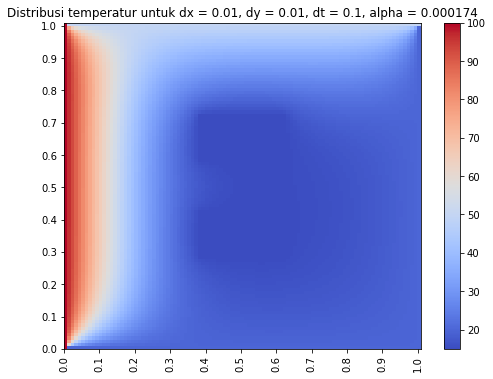

Waktu komputasi : 36.9651 detik
Simulasi untuk t = 200


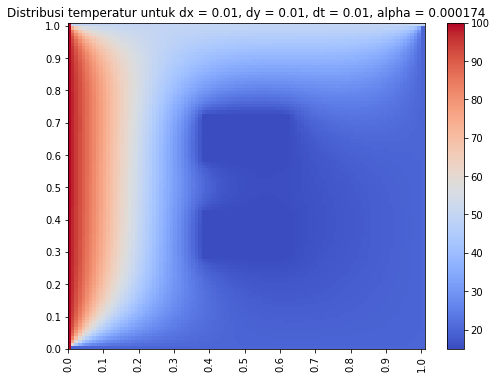

Waktu komputasi : 708.5467 detik


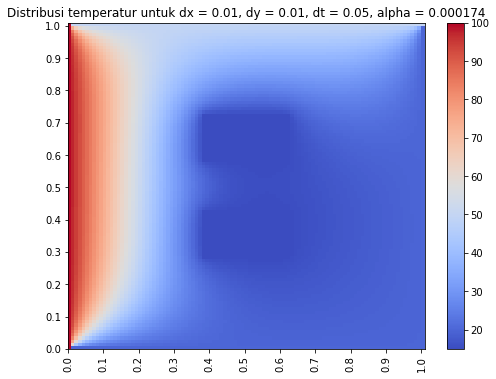

Waktu komputasi : 143.4604 detik


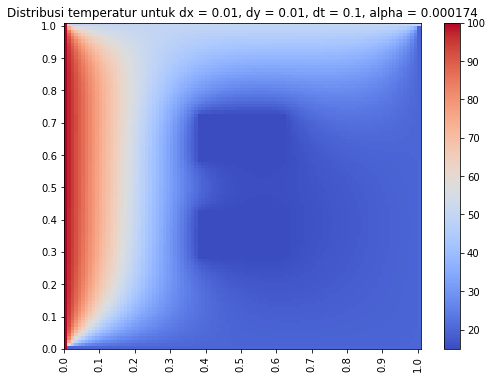

Waktu komputasi : 70.7602 detik
Simulasi untuk t = 300


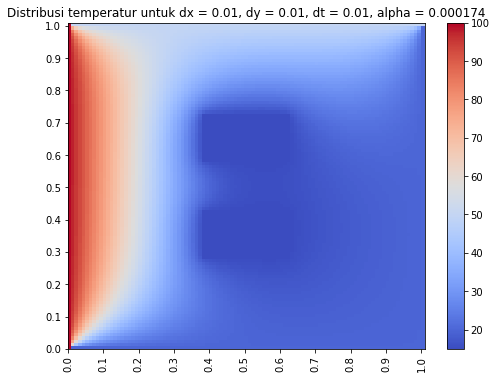

Waktu komputasi : 1096.8132 detik


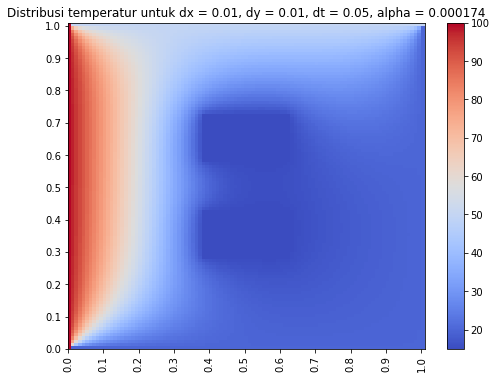

Waktu komputasi : 208.702 detik


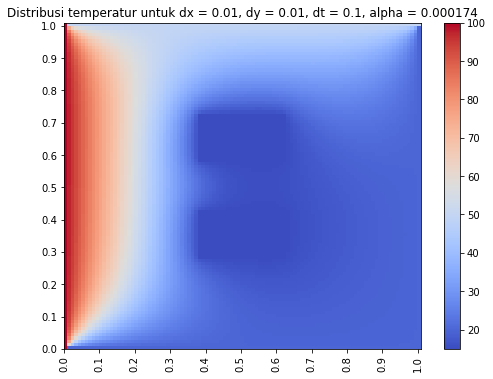

Waktu komputasi : 103.603 detik


In [33]:
print('Simulasi untuk alpha = %s'%alpha)
for t in var_t:
    print('Simulasi untuk t = %s'%t)
    for i in var_dt:
        waktu_awal = time.time()
        distribusi_3 = FDM(T_t0_3, 0.01, 0.01, i, t, alpha)
        matriks_fdm_3 = distribusi_3.matriks()
        plot_fdm_3 = distribusi_3.plot(matriks_fdm_3, figsize=(8,6), ticks=10)
        print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

### 2) Variasi material

Simulasi untuk alpha = 0.000117
Simulasi untuk t = 100


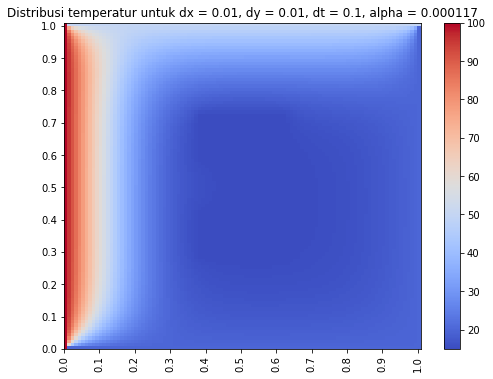

Waktu komputasi : 35.3629 detik
Simulasi untuk t = 200


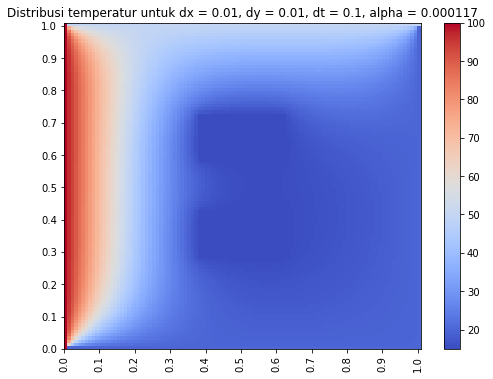

Waktu komputasi : 66.0769 detik
Simulasi untuk t = 300


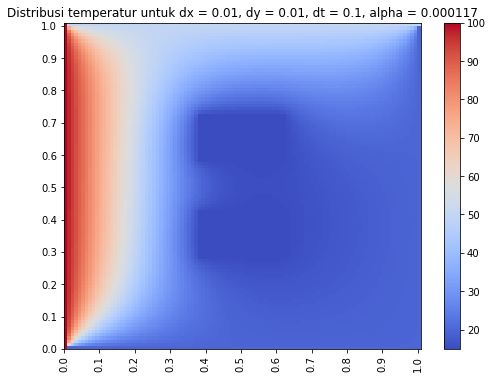

Waktu komputasi : 112.6115 detik


In [34]:
# TEMBAGA
print('Simulasi untuk alpha = %s'%alpha2)
for t in var_t:
    print('Simulasi untuk t = %s'%t)
    waktu_awal = time.time()
    distribusi_3 = FDM(T_t0_3, 0.01, 0.01, 0.1, t, alpha2)
    matriks_fdm_3 = distribusi_3.matriks()
    plot_fdm_3 = distribusi_3.plot(matriks_fdm_3, figsize=(8,6), ticks=10)
    print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

Simulasi untuk alpha = 2.07e-05
Simulasi untuk t = 100


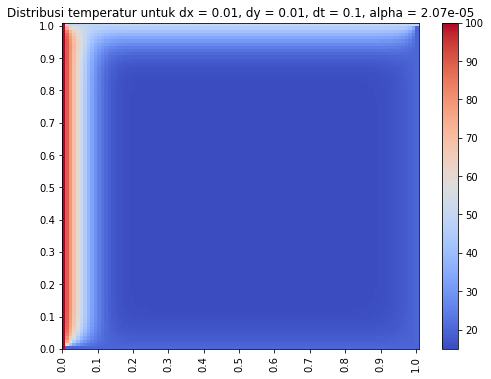

Waktu komputasi : 36.1161 detik
Simulasi untuk t = 200


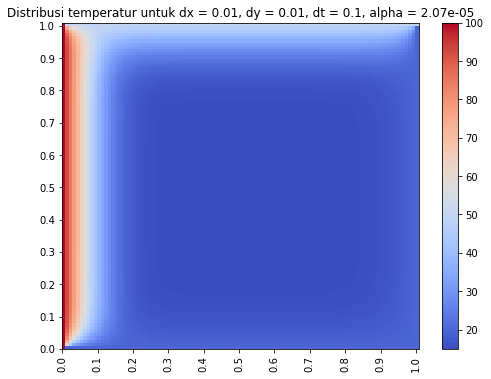

Waktu komputasi : 67.3144 detik
Simulasi untuk t = 300


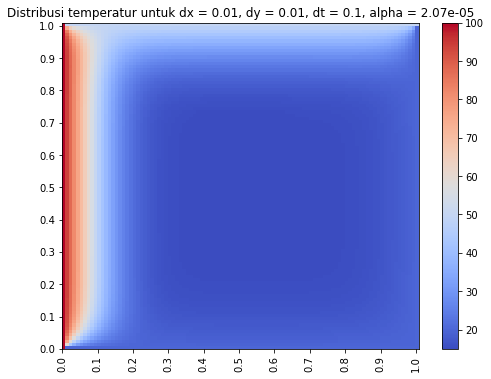

Waktu komputasi : 100.0528 detik


In [35]:
# BESI (Armco 99.75% murni)
alpha3 = 20.7e-6
print('Simulasi untuk alpha = %s'%alpha3)
for t in var_t:
    print('Simulasi untuk t = %s'%t)
    waktu_awal = time.time()
    distribusi_3 = FDM(T_t0_3, 0.01, 0.01, 0.1, t, alpha3)
    matriks_fdm_3 = distribusi_3.matriks()
    plot_fdm_3 = distribusi_3.plot(matriks_fdm_3, figsize=(8,6), ticks=10)
    print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

In [ ]:
# # PERBANDINGAN BESI (Armco 99.75% murni)
# alpha3 = 20.7e-6
# print('Simulasi untuk alpha = %s'%alpha3)
# for t in [500, 750, 1000]:
#     print('Simulasi untuk t = %s'%t)
#     waktu_awal = time.time()
#     distribusi_3 = FDM(T_t0_3, 0.01, 0.01, 0.1, t, alpha3)
#     matriks_fdm_3 = distribusi_3.matriks()
#     plot_fdm_3 = distribusi_3.plot(matriks_fdm_3, figsize=(8,6), ticks=10)
#     print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

### 4) Variasi dt

Waktu komputasi : 0.0889 detik


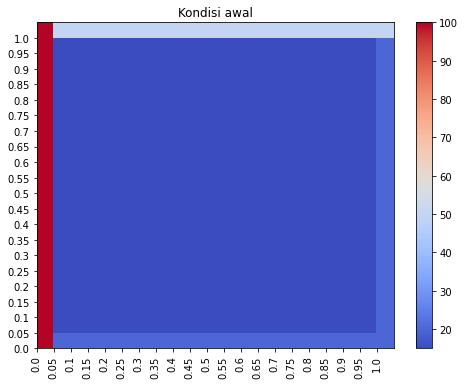

In [31]:
# cek kestabilan dt
waktu_awal = time.time()
awal_2 = Awal(0.05,0.05,T0)
T_t0_2 = awal_2.matriks()
awal_2.plot(T_t0_2, figsize=(8,6))
print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

Simulasi untuk t = 50 detik


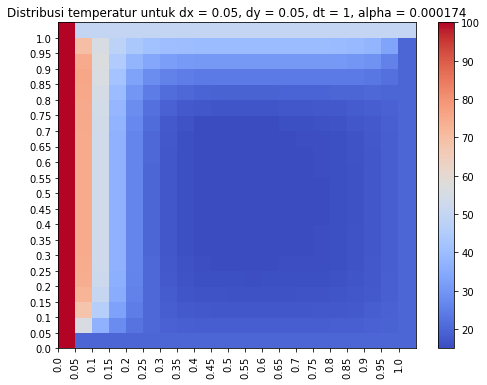

Waktu komputasi : 0.4675 detik


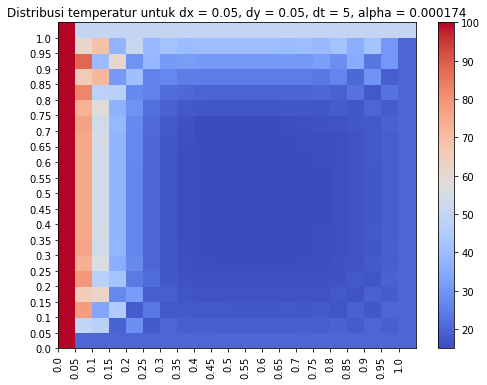

Waktu komputasi : 0.4357 detik


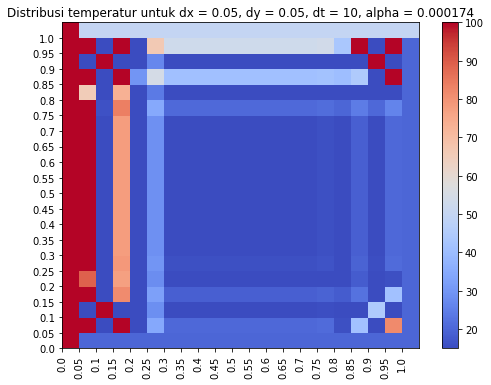

Waktu komputasi : 0.4898 detik
Simulasi untuk t = 100 detik


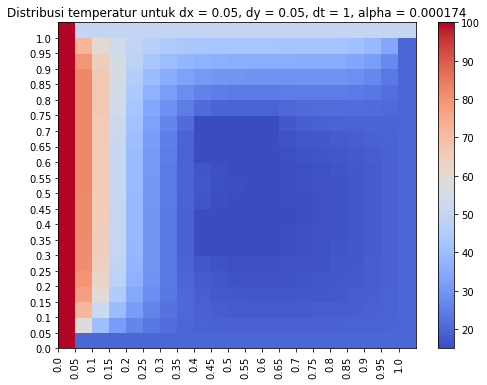

Waktu komputasi : 0.6988 detik


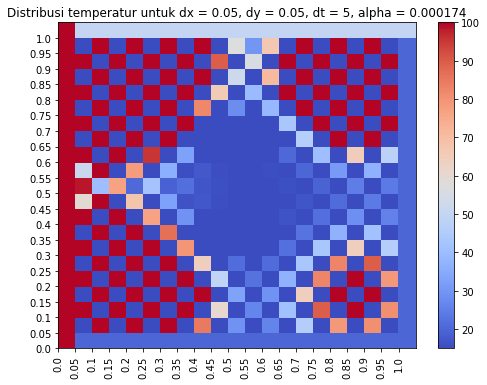

Waktu komputasi : 0.4439 detik


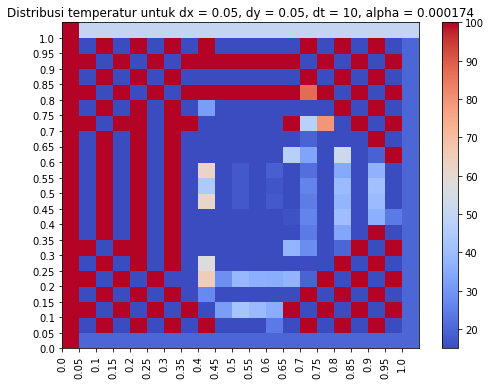

Waktu komputasi : 0.5275 detik


In [32]:
for t in [50, 100]:
    print('Simulasi untuk t = %s detik'%t)
    for dt in [1,5,10]:
        waktu_awal = time.time()
        distribusi_2 = FDM(T_t0_2, 0.05, 0.05, dt, t, 1.74e-4)
        matriks_fdm_2 = distribusi_2.matriks()
        plot_fdm = distribusi_2.plot(matriks_fdm_2,figsize=(8,6))
        print('Waktu komputasi : %s detik'%round((time.time() - waktu_awal),4))

In [ ]:
# # cek nilai tiap titik (node)
# import pandas as pd
# pd.set_option('display.max_rows',500)
# pd.set_option('display.max_columns',500)
# pd.DataFrame(matriks_fdm_2)